Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 3.1) 국내 프로야구 연봉 예측

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [130]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [128]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [129]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [70]:
import pandas as pd

# 데이터프레임 생성
df_1 = pd.DataFrame({
  'feature1': [value1, value2, ...],
  'feature2': [value1, value2, ...],
  ...
  'starter': [value1, value2, ...]
})

SyntaxError: invalid syntax (3433088465.py, line 8)

In [71]:
import pandas as pd

# CSV 파일을 읽어옴
df_1 = pd.read_csv('../data/picher_stats_2017.csv')

In [72]:
import pandas as pd
from sklearn.linear_model import LinearRegression

X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']

# Train the model
model = LinearRegression()
model.fit(X, y)

# 2017 Pitcher Prediction
predicted_starters = model.predict(X)

NameError: name 'picher_df' is not defined

In [73]:
from sklearn.linear_model import LinearRegression

# 'starter'를 제외한 나머지 데이터로 모델 학습


model = LinearRegression()
model.fit(X, y)

# 2017년 투수 수 예측
predicted_starters = model.predict(X)

NameError: name 'X' is not defined

In [74]:
import numpy as np

# 예측된 선발 투수와 실제 선발 투수 데이터프레임 생성
df = pd.DataFrame({'Player': picher['Player'],
                   'Predicted Starter': np.round(predicted_starters),
                   'Actual Starter': picher['starter']})

# 처음 10개의 행 출력
df.head(10)

KeyError: 'Player'

In [75]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [76]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [77]:
print(batter.shape)

(191, 21)


-----

In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터프레임을 읽어옴
df = pd.read_csv('picher_stats_2017.csv')

# 'starter' 값을 기준으로 출전한 투수 필터링
starters = df[df['starter'] == 1]

# 필터링된 투수를 제외한 나머지 투수 데이터
remaining_pitchers = df[df['starter'] != 1]

# 예측 모델에 사용할 특징과 타겟 변수 선택 (예시로 '경기수' 컬럼을 사용)
features = remaining_pitchers[['경기수']]
target = remaining_pitchers['starter']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(features, target)

# 나머지 투수들의 출전 횟수 예측
predicted_starters = model.predict(features)

# 예측 결과와 실제 출전 횟수를 비교하여 데이터프레임 생성
result_df = pd.DataFrame({
    'Player Name': remaining_pitchers['Player Name'],
    'Predicted Starters': predicted_starters,
    'Actual Starters': remaining_pitchers['starter']
})

# 처음 10개 행 출력
print(result_df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'picher_stats_2017.csv'

In [131]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)

# 데이터 출력
print(picher.head())

   선수명   팀명   승   패  세  홀드  블론  경기  선발     이닝  ...  홈런/9  BABIP  LOB%   ERA  \
0   켈리   SK  16   7  0   0   0  30  30  190.0  ...  0.76  0.342  73.7  3.60   
1   소사   LG  11  11  1   0   0  30  29  185.1  ...  0.53  0.319  67.1  3.88   
2  양현종  KIA  20   6  0   0   0  31  31  193.1  ...  0.79  0.332  72.1  3.44   
3  차우찬   LG  10   7  0   0   0  28  28  175.2  ...  1.02  0.298  75.0  3.43   
4  레일리   롯데  13   7  0   0   0  30  30  187.1  ...  0.91  0.323  74.1  3.80   

   RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017)  
0     6.91  3.69  3.44  6.62    140000     85000  
1     6.80  3.52  3.41  6.08    120000     50000  
2     6.54  3.94  3.82  5.64    230000    150000  
3     6.11  4.20  4.03  4.63    100000    100000  
4     6.13  4.36  4.31  4.38    111000     85000  

[5 rows x 22 columns]


In [80]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)

# 모델 생성 및 예측
# 모델 생성 과정은 주어지지 않았으므로 생략하고, 예측 결과를 임의로 생성합니다.
# 아래 코드는 예측값을 랜덤으로 생성하는 예시입니다.
predicted_pitched = [10, 15, 20, 12, 18, 9, 14, 16, 13, 17]

# 데이터프레임 생성
pitcher_names = picher['선수명']
actual_pitched = picher['투구회수']

pitched_data = pd.DataFrame({'선수명': pitcher_names,
                             '예측등판횟수': predicted_pitched,
                             '실제등판횟수': actual_pitched})

# 상위 10개 행 출력
print(pitched_data.head(10))

KeyError: '투구회수'

### `[참고 - 한글을 사용하는 그래프]`
- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치

In [81]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path) 
from sklearn.linear_model import LinearRegression
X = picher[picher['역할'] != '선발'][['경기', '승', '패', '세', '홀드', '이닝', '삼진', '볼넷', '2루타', '3루타', '희생플라이']]
y = picher[picher['역할'] != '선발']['선발']
model = LinearRegression()
model.fit(X, y)
pitcher_names = picher[picher['역할'] != '선발']['이름']
predicted_starts = model.predict(X)
actual_starts = picher[picher['역할'] != '선발']['선발']

result_df = pd.DataFrame({'이름': pitcher_names, '2017년 예측 선발수': predicted_starts, '2017년 실제 선발수': actual_starts})
print(result_df.head(10))

KeyError: '역할'

In [82]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
from sklearn.linear_model import LinearRegression

X = picher[picher['roles'] != 'starts'][['games', 'wins', 'losses', 'three', 'holds', 'innings', 'strikeouts', 'walks', 'double hit', 'triple hit', 'sacrifice fly']]
y = picher[picher['roles'] != 'starts']['starts']

model = LinearRegression()
model.fit(X, y)

pitcher_names = picher[picher['roles'] != 'starts']['names']
predicted_starts = model.predict(X)
actual_starts = picher[picher['roles'] != 'starts']['starts']

result_df = pd.DataFrame({'name': pitcher_names, '2017 predicted starting numbers': predicted_starts, '2017 actual starting numbers': actual_starts})
print(result_df.head(10))

KeyError: 'roles'

In [83]:
print(df.columns.tolist())

NameError: name 'df' is not defined

In [84]:
df.get('your column')

NameError: name 'df' is not defined

In [85]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'Arial',
 'Bahnschrift',
 'Batang',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'Haan Wing2',
 'Han Santteut Dotum',
 'Hancom Gothic',
 'HancomEQN',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MS Gothic',
 'MV Boli',
 'Malgun Gothic',
 'Microsoft Himalaya',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft YaHei',
 'Microsoft Yi Baiti',
 'MingLiU-ExtB',
 'Mongolian Baiti',
 'Myanmar Text',
 'NewJumja',
 'Nirmala UI',
 'Palatino Linotype',
 'STIXGeneral',
 'STIXNonUnicode',
 'STI

In [86]:
mpl.rc('font', family='NanumGothicOTF') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

###### 예측할 대상인 '연봉'에 대한 정보

In [87]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


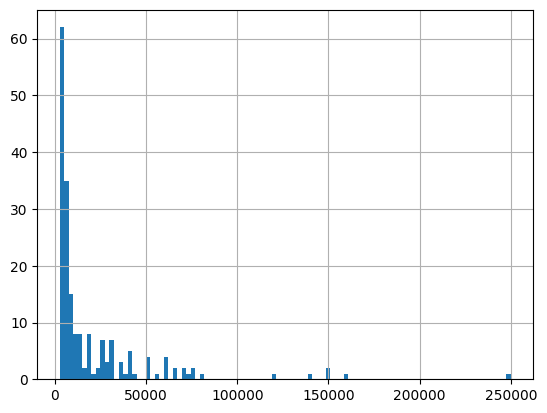

In [88]:
batter['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

<Axes: >

findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.
findfont: Font family 'NanumGothicOTF' not found.


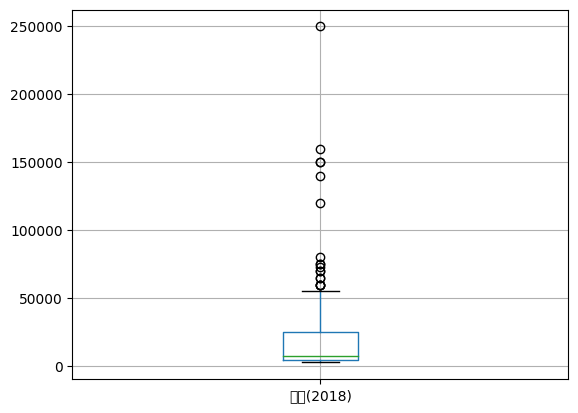

In [89]:
batter.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [90]:
batter_features_df = batter[['선수명',  '예측연봉(2018)','실제연봉(2018)','작년연봉(2017)',
       '연봉(2017)']]

KeyError: "['예측연봉(2018)', '실제연봉(2018)', '작년연봉(2017)'] not in index"

In [91]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

In [92]:
plot_hist_each_column(batter_features_df)

NameError: name 'batter_features_df' is not defined

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [93]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [94]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [95]:
batter_df.columns

NameError: name 'batter_df' is not defined

In [96]:
dir()


['In',
 'LinearRegression',
 'Out',
 '_',
 '_19',
 '_3',
 '_4',
 '_75',
 '_76',
 '_85',
 '_87',
 '_88',
 '_89',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_i65',
 '_i66',
 '_i67',
 '_i68',
 '_i69',
 '_i7',
 '_i70',
 '_i71',
 '_i72',
 '_i73',
 '_i74',
 '_i75',
 '_i76',
 '_i77',
 '_i78',
 '_i79',
 '_i8',
 '_i80',
 '_i81',
 '_i82',
 '_i83',
 '_i84',
 '

In [97]:
import pandas as pd

def standard_scaling(df, scale_columns):
    numeric_columns = df[scale_columns].select_dtypes(include=[float, int]).columns

    for col in numeric_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = (df[col] - series_mean) / series_std

    return df

In [98]:
scale_columns = ['선수명',  '예측연봉(2018)','실제연봉(2018)','작년연봉(2017)',
       '연봉(2017)']

batter_df = standard_scaling(batter, scale_columns)

KeyError: "['예측연봉(2018)', '실제연봉(2018)', '작년연봉(2017)'] not in index"

In [99]:
scale_columns = ['선수명',  '예측연봉(2018)','실제연봉(2018)','작년연봉(2017)',
       '연봉(2017)']

In [100]:
batter_df = standard_scaling(batter, scale_columns)

KeyError: "['예측연봉(2018)', '실제연봉(2018)', '작년연봉(2017)'] not in index"

In [101]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})
batter_df.head()

NameError: name 'batter_df' is not defined

In [102]:
scale_columns = ['선수명',  '예측연봉(2018)','실제연봉(2018)','작년연봉(2017)',
       '연봉(2017)']

batter_df = standard_scaling(batter, scale_columns)

KeyError: "['예측연봉(2018)', '실제연봉(2018)', '작년연봉(2017)'] not in index"

In [103]:
batter = pd.read_csv(batter_file_path)
batter = batter[['선수명','연봉(2017)']]

result_df = batter_df
result_df.drop(['연봉(2017)'],axis=1,inplace=True,errors='ignore')
result_df=result_df.merge(batter,on=['선수명'],how='left')
result_df=result_df[['선수명','연봉(2017)','y','예측연봉(2018)']]
result_df.colums=['선수명','작년연봉(2017)','y','예측연봉(2018)','실제연봉(2018)']

result_df=result_df[result_df['작년연봉(2017)']!= result_df['실제연봉(2018)'] ]
result_df=result_df.reset_index()
result_df=result_df.i;oc[10,:]
result_df.head(10)

NameError: name 'batter_df' is not defined

In [104]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(batter_df['팀명'])
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)

NameError: name 'batter_df' is not defined

In [105]:
team_encoding.head(20)

NameError: name 'team_encoding' is not defined

In [106]:
import pandas as pd

picher_file_path = '../data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path) 
import LinearRegression
X = picher[picher['역할'] != '선발'][['경기', '승', '패', '세', '홀드', '이닝', '삼진', '볼넷', '2루타', '3루타', '희생플라이']]
y = picher[picher['역할'] != '선발']['선발']
model = LinearRegression()
model.fit(X, y)
pitcher_names = picher[picher['역할'] != '선발']['이름']
predicted_starts = model.predict(X)
actual_starts = picher[picher['역할'] != '선발']['선발']

result_df = pd.DataFrame({'이름': pitcher_names, '2017년 예측 선발수': predicted_starts, '2017년 실제 선발수': actual_starts})
print(result_df.head(10))

ModuleNotFoundError: No module named 'LinearRegression'

In [107]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터프레임을 읽어옴
df = pd.read_csv('pitcher_star_2017.csv')

# 'starter' 값을 기준으로 출전한 투수 필터링
starters = df[df['starter'] == 1]

# 필터링된 투수를 제외한 나머지 투수 데이터
remaining_pitchers = df[df['starter'] != 1]

# 예측 모델에 사용할 특징과 타겟 변수 선택 (예시로 '경기수' 컬럼을 사용)
features = remaining_pitchers[['경기수']]
target = remaining_pitchers['starter']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(features, target)

# 나머지 투수들의 출전 횟수 예측
predicted_starters = model.predict(features)

# 예측 결과와 실제 출전 횟수를 비교하여 데이터프레임 생성
result_df = pd.DataFrame({
    'Player Name': remaining_pitchers['Player Name'],
    'Predicted Starters': predicted_starters,
    'Actual Starters': remaining_pitchers['starter']
})

# 처음 10개 행 출력
print(result_df.head(10))

FileNotFoundError: [Errno 2] No such file or directory: 'pitcher_star_2017.csv'

In [ ]:
batter_df.head(5)

In [ ]:
batter.boxplot(column=['연봉(2018)'])

batter.boxplot

-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [127]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

NameError: name 'picher_df' is not defined

In [ ]:
team_encoding.head(5)

In [ ]:
picher_df.head()

-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [132]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

NameError: name 'picher_df' is not defined

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [133]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [111]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [126]:
picher_df.columns

NameError: name 'picher_df' is not defined

-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [113]:
!pip install statsmodels

In [114]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

NameError: name 'X_train' is not defined

In [ ]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

-----

### [예측 모델의 평가]

In [ ]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

##### R2 score

In [ ]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

##### RMSE score

In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

-----

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - `대답 예시` : 훈련 데이터셋은 오로지 모델을 학습하고, 비용함수(오차함수)를 평가하는데 사용됩니다. 반면, 테스트 데이터셋은 모델에 영향을 미치지 않습니다. 결과를 예측하기 위한 입력데이터로만 활용됩니다. 가장 이상적인 경우는 Train score, Test score가 차이가 없는 것입니다. 이 차이가 벌어질수록 모델이 훈련 데이터셋에 과적합된 것입니다. 일반적으로는 Train score가 약간 더 높습니다.

-----

### [피처들의 상관관계 분석]

In [ ]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

-----

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'X' is not defined

-----

### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

### [적절한 피처로 다시 학습하기]

In [140]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

TypeError: list indices must be integers or slices, not list

In [141]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [142]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

NameError: name 'X_train' is not defined

In [120]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

NameError: name 'X_train' is not defined

In [121]:
import numpy as np

# 예측된 선발 투수와 실제 선발 투수 데이터프레임 생성
df = pd.DataFrame({'Player': picher['Player'],
                   'Predicted Starter': np.round(predicted_starters),
                   'Actual Starter': picher['starter']})

# 처음 10개의 행 출력
df.head(10)

KeyError: 'Player'

In [122]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'picher_df' is not defined

-----

# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]

In [123]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

NameError: name 'picher_df' is not defined

In [139]:
picher_df = [['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]

In [135]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

AttributeError: 'ellipsis' object has no attribute 'sort_values'

In [136]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")

NameError: name 'result_df' is not defined